Task 1

Перші 5 рядків:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Target
0   0.865653  -0.564248   1.430042   0.184551   0.353585       1
1   1.190365  -1.096275  -0.954060  -1.440051   0.353905       1
2   1.766204   2.157308   2.211229  -0.605715   1.676713       1
3   0.949206   0.569767  -0.194437   0.447709   0.216492       0
4  -2.202015  -0.676392  -1.308245   1.800940   0.818553       0

--- Результати (Sklearn Generated Data) ---
Accuracy: 0.8833

Звіт класифікації:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        23
           1       1.00      0.81      0.90        37

    accuracy                           0.88        60
   macro avg       0.88      0.91      0.88        60
weighted avg       0.91      0.88      0.88        60



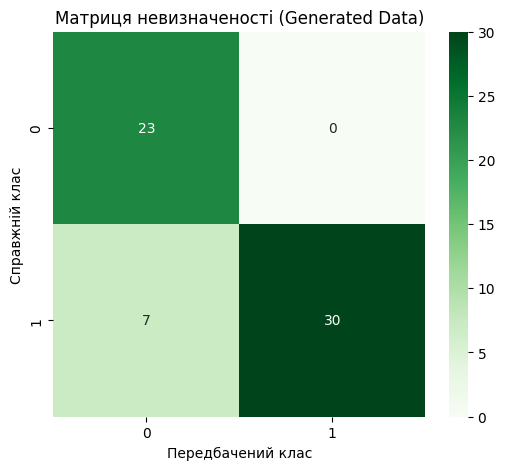

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# === КРОК 1: Генерація даних (Dataset Generator) ===
# Створюємо датасет: 300 зразків, 5 ознак, 2 класи
X, y = make_classification(n_samples=300, n_features=5, n_informative=3, n_redundant=0, random_state=42)

# Зберігаємо у DataFrame
df_gen = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(5)])
df_gen['Target'] = y

print("Перші 5 рядків:")
print(df_gen.head())

# === КРОК 2: Поділ даних ===
X_train, X_test, y_train, y_test = train_test_split(
    df_gen.drop('Target', axis=1), 
    df_gen['Target'], 
    test_size=0.2, 
    random_state=42
)

# === КРОК 3: Моделювання ===
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# === КРОК 4: Оцінка ===
print("\n--- Результати (Sklearn Generated Data) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nЗвіт класифікації:")
print(classification_report(y_test, y_pred))

# Матриця невизначеності
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Матриця невизначеності (Generated Data)')
plt.ylabel('Справжній клас')
plt.xlabel('Передбачений клас')
plt.show()